In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#importing and scaling handwritten digits dataset
from tensorflow import keras

(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

X_train_flat = X_train.reshape(len(X_train), 28*28)
X_test_flat = X_test.reshape( len(X_test), 28*28)

X_train_flat = X_train_flat / 255
X_test_flat = X_test_flat / 255

In [3]:
class My_Neural_network:
    
    def __init__ (self,units,input_shape):
        self.units = units
        self.input_shape = input_shape
        self.weights = self.xavier_initializer(input_shape,units)
        self.biases = np.zeros(units)
        
    def xavier_initializer(self,input_dim, output_dim):
        limit = np.sqrt(6 / (input_dim + output_dim))
        return np.random.uniform(-limit, limit, (input_dim, output_dim))
    
    def fit(self, x_train, y_train, epochs=5, learning_rate=0.001):
        self.length = len(x_train)
        self.y_encoded = np.eye(self.units)[y_train]
        self.y_train = y_train
        self.graph =[]
        
        self.prediction_matrix = np.dot(x_train,self.weights)
        self.prediction_matrix = self.prediction_matrix + self.biases
        self.prediction_matrix = self.sigmoid(self.prediction_matrix)
        
        for i in range(epochs):
            self.prediction_matrix = np.dot(x_train,self.weights)
            self.prediction_matrix = self.prediction_matrix + self.biases
            self.prediction_matrix = self.sigmoid(self.prediction_matrix)
            
            self.graph.append(self.loss_calculation())
            if (i+1)%50 == 0:
                print(f"Epoch- {i+1}   Loss- {self.loss_calculation()}" )

            temp = (self.prediction_matrix - self.y_encoded) * self.prediction_matrix * (1 - self.prediction_matrix)

            w_gradients = np.dot( x_train.T, temp ) / self.length
            self.weights = self.weights - (learning_rate * w_gradients)

            b_gradients = np.mean(temp, axis=0)
            self.biases = self.biases - (learning_rate * b_gradients)
        
    def loss_calculation(self):
        total_loss=0
        for i in range(self.length):
            total_loss += self.cross_entropy(self.prediction_matrix[i],self.y_train[i])
            
        return total_loss / self.length
        
        
    def sigmoid(self,z):
        return 1/(1+np.exp(-z))
    
    def cross_entropy(self, prediction_matrix_value, y_train_value):
        epsilon = 1e-6
        return -np.log( prediction_matrix_value[y_train_value] + epsilon)
    
    def predict(self, x_test):
        self.predicted_matrix = np.dot(x_test,self.weights)
        self.predicted_matrix = self.predicted_matrix + self.biases
        self.predicted_matrix = self.sigmoid(self.predicted_matrix)
        return self.predicted_matrix
    
    def accuracy_score(self,predicted_matrix,y_test):
        correct = 0
        for i in range(len(predicted_matrix)):
            if y_test[i] == np.argmax(predicted_matrix[i]):
                correct += 1
                
        return correct/len(predicted_matrix)
    

In [4]:
model = My_Neural_network(10, input_shape=784)

In [5]:
model.weights.shape

(784, 10)

In [6]:
model.fit(X_train_flat, y_train, epochs=300, learning_rate=1)

Epoch- 50   Loss- 0.7484854175083363
Epoch- 100   Loss- 0.6190853599712158
Epoch- 150   Loss- 0.5750108797535198
Epoch- 200   Loss- 0.5508781691516209
Epoch- 250   Loss- 0.5352163256276382
Epoch- 300   Loss- 0.5240294090732607


In [7]:
predicred = model.predict(X_test_flat)

In [8]:
model.accuracy_score(predicred,y_test)

0.8946

In [9]:
x = np.arange(1,301)

Text(0, 0.5, 'Cost Value')

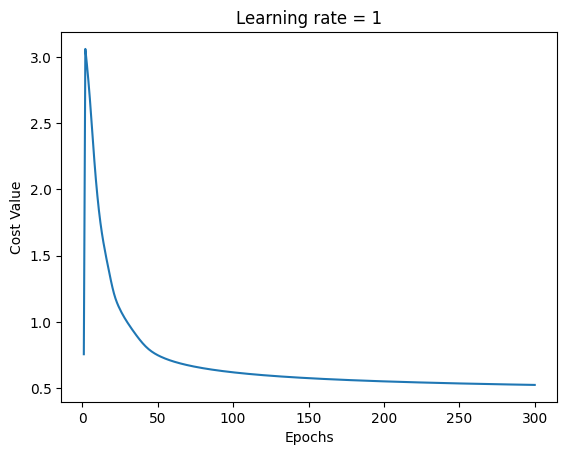

In [10]:
plt.plot(x,model.graph)
plt.title("Learning rate = 1")
plt.xlabel("Epochs")
plt.ylabel("Cost Value")

In [11]:
model.graph[:10]

[0.7556452884997291,
 3.0596256196613467,
 2.94786820787112,
 2.8233716364122747,
 2.684906593474239,
 2.532786870085478,
 2.371845613422667,
 2.214385253455839,
 2.0733058615747084,
 1.9499574896748995]

In [12]:
model2 = My_Neural_network(10, input_shape=784)

In [13]:
model2.fit(X_train_flat, y_train, epochs=300, learning_rate=0.1)

Epoch- 50   Loss- 1.7226329923327381
Epoch- 100   Loss- 1.4003331440722975
Epoch- 150   Loss- 1.1886864837603137
Epoch- 200   Loss- 1.0699426977873332
Epoch- 250   Loss- 0.982204246560494
Epoch- 300   Loss- 0.9067285581408374


In [14]:
predicred2 = model2.predict(X_test_flat)
model2.accuracy_score(predicred2,y_test)

0.7936

Text(0, 0.5, 'Cost Value')

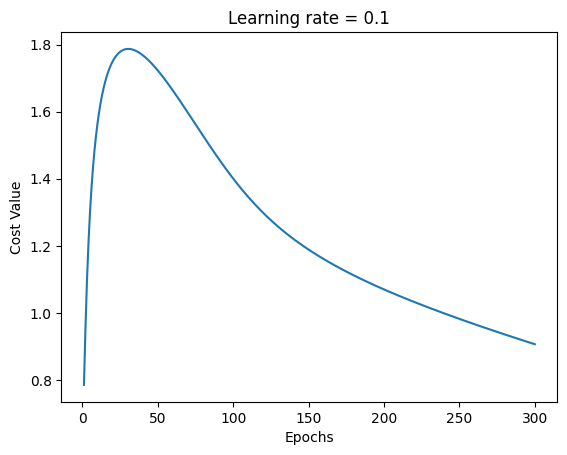

In [20]:
plt.plot(x,model2.graph)
plt.title("Learning rate = 0.1")
plt.xlabel("Epochs")
plt.ylabel("Cost Value")

In [16]:
model2.graph[:5]

[0.7853977501966612,
 0.9533616703341333,
 1.094852070635284,
 1.2083204916637913,
 1.2992005726347344]

In [17]:
model3 = My_Neural_network(10, input_shape=784)
model3.fit(X_train_flat, y_train, epochs=300, learning_rate=0.01)

Epoch- 50   Loss- 1.306285338374953
Epoch- 100   Loss- 1.5361384855080897
Epoch- 150   Loss- 1.6469015563064975
Epoch- 200   Loss- 1.7016035455090193
Epoch- 250   Loss- 1.7240619049116743
Epoch- 300   Loss- 1.725817901268402


In [18]:
predicred3 = model3.predict(X_test_flat)
model3.accuracy_score(predicred2,y_test)

0.7936

Text(0, 0.5, 'Cost Value')

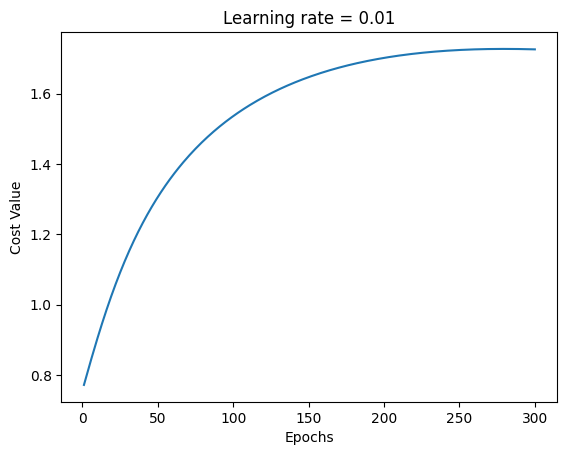

In [21]:
plt.plot(x,model3.graph)
plt.title("Learning rate = 0.01")
plt.xlabel("Epochs")
plt.ylabel("Cost Value")